In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


 Load the dataset into a pandas dataframe

In [4]:
df = pd.read_csv('w_temperature.csv',low_memory=False)

In [5]:
# Read top 6 rows from the dataset
df.head(6)

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1.0,1.0,1995.0,64.2
1,Africa,Algeria,Algiers,1.0,2.0,1995.0,49.4
2,Africa,Algeria,Algiers,1.0,3.0,1995.0,48.8
3,Africa,Algeria,Algiers,1.0,4.0,1995.0,46.4
4,Africa,Algeria,Algiers,1.0,5.0,1995.0,47.9
5,Africa,Algeria,Algiers,1.0,6.0,1995.0,48.7


TEMPERATURE DISTRIBUTION ANALYSIS

 Calculate summary statistics for the temperature data using numpy

In [6]:
temp_mean = np.mean(df['AvgTemperature'])
temp_median = np.median(df['AvgTemperature'])
temp_std = np.std(df['AvgTemperature'])

 Print out the summary statistics

In [7]:
median_temp = df['AvgTemperature'].dropna().median()
print('Temperature Mean:', temp_mean)
print('Temperature Median:', median_temp)
print('Temperature Standard Deviation:', temp_std)


Temperature Mean: 55.977159338075516
Temperature Median: 63.7
Temperature Standard Deviation: 37.453412792775325


Create a histogram of the temperature data using matplotlib

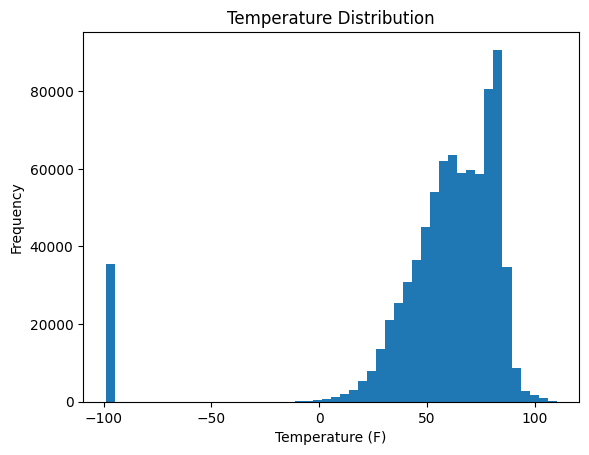

In [9]:
plt.hist(df['AvgTemperature'], bins=50)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

Create a kernel density plot of the temperature data using seaborn

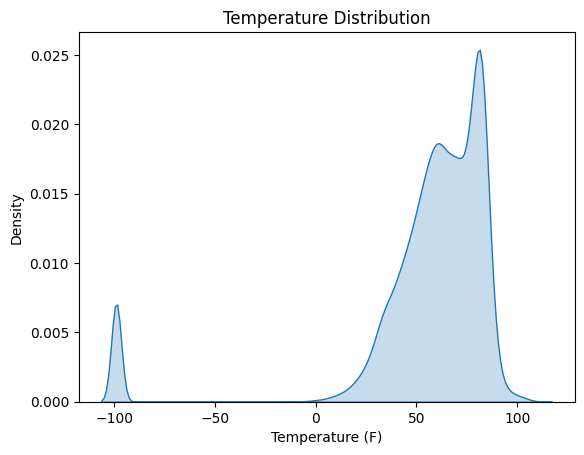

In [10]:
sns.kdeplot(df['AvgTemperature'], fill=True)
plt.xlabel('Temperature (F)')
plt.ylabel('Density')
plt.title('Temperature Distribution')
plt.show()

ANALYZING TEMPERATURE BY REGION

Group the data by state and calculate the mean temperature for each region

In [11]:
region_means = df.groupby('Region')['AvgTemperature'].mean()
print(region_means)

Region
Africa                     54.237269
Asia                       66.518981
Australia/South Pacific    61.180869
Europe                     47.063649
Middle East                68.260998
Name: AvgTemperature, dtype: float64


 Create a bar chart of the mean temperature for each region

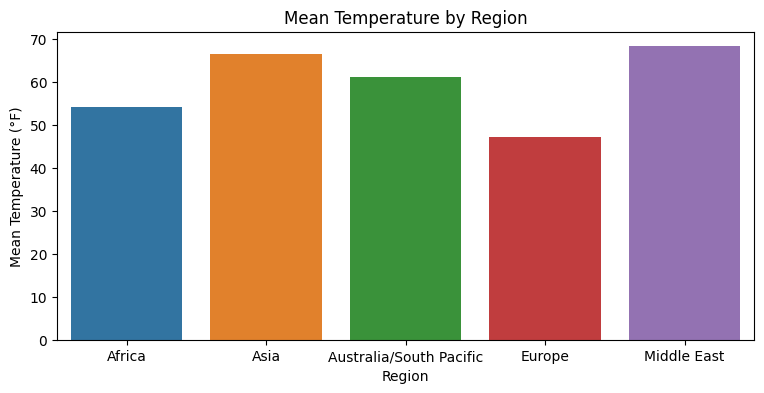

In [12]:
plt.figure(figsize=(9,4))
sns.barplot(x=region_means.index, y=region_means.values)
plt.title('Mean Temperature by Region')
plt.xlabel('Region')
plt.ylabel('Mean Temperature (°F)')
plt.show()

Calculate the correlation between average temperature and year for each Region

In [13]:
region_correlations = df.groupby('Region')[['AvgTemperature', 'Year']].corr().loc[pd.IndexSlice[:, 'AvgTemperature'], 'Year']
print(region_correlations)

Region                                 
Africa                   AvgTemperature    0.098275
Asia                     AvgTemperature    0.092871
Australia/South Pacific  AvgTemperature    0.059127
Europe                   AvgTemperature    0.127201
Middle East              AvgTemperature    0.105493
Name: Year, dtype: float64


Create a heatmap of the correlations between temperature and year for each region

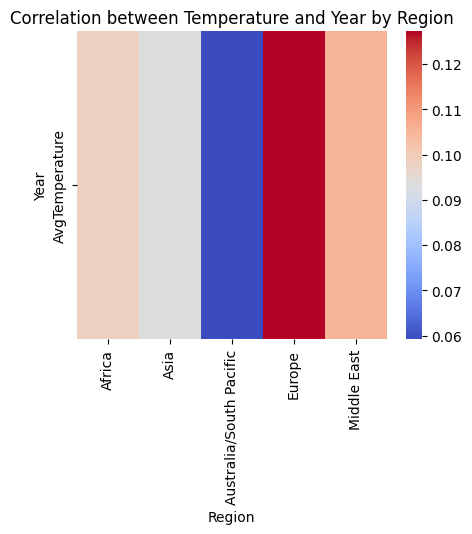

In [14]:
plt.figure(figsize=(5, 4))
sns.heatmap(region_correlations.unstack(level=0), cmap='coolwarm')
plt.title('Correlation between Temperature and Year by Region')
plt.xlabel('Region')
plt.ylabel('Year')
plt.show()

 Highest and Lowest temperature recorded country from dataset

In [15]:
high = df.sort_values(by=['AvgTemperature'],ascending=False).head(1)
low = df.sort_values(by=['AvgTemperature'],ascending=True).head(1)
data = pd.concat([high,low],)
data.index = ['Highest','Lowest']
data

,Region,Country,City,Month,Day,Year,AvgTemperature
Highest,Middle East,Kuwait,Kuwait,8.0,1.0,2012.0,110.0
Lowest,Europe,Germany,Hamburg,9.0,30.0,2007.0,-99.0


TEMPRATURE ANALYSIS IN INDIA

In [16]:
# Filter the data to include only the rows for India
country = 'India'
df_filtered = df[df['Country'] == country]
df_filtered.head(4)

,Region,Country,City,Month,Day,Year,AvgTemperature
255005,Asia,India,Bombay (Mumbai),1.0,1.0,1995.0,71.8
255006,Asia,India,Bombay (Mumbai),1.0,2.0,1995.0,72.0
255007,Asia,India,Bombay (Mumbai),1.0,3.0,1995.0,70.3
255008,Asia,India,Bombay (Mumbai),1.0,4.0,1995.0,69.7


In [17]:
city_temps = df_filtered.groupby('City')['AvgTemperature'].mean()
print(city_temps)


City
Bombay (Mumbai)     81.550939
Calcutta            78.871811
Chennai (Madras)    82.847021
Delhi               75.798856
Name: AvgTemperature, dtype: float64


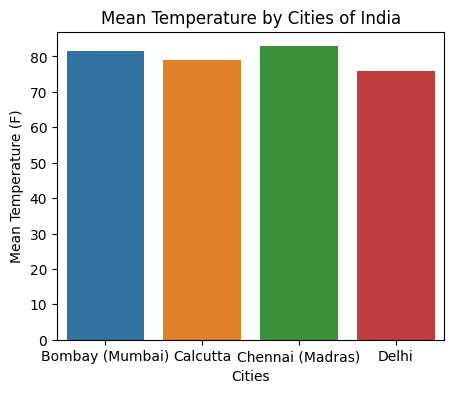

In [18]:

plt.figure(figsize=(5,4))
sns.barplot(x=city_temps.index, y=city_temps.values)
plt.title("Mean Temperature by Cities of India")
plt.xlabel("Cities")
plt.ylabel("Mean Temperature (F)")
plt.show()

Calculate the correlation between average temperature and year for each city

In [19]:
city_correlations = df_filtered.groupby('City')[['AvgTemperature', 'Year']].corr().loc[pd.IndexSlice[:, 'AvgTemperature'], 'Year']
print(city_correlations)

City                            
Bombay (Mumbai)   AvgTemperature    0.035519
Calcutta          AvgTemperature    0.013761
Chennai (Madras)  AvgTemperature    0.045414
Delhi             AvgTemperature    0.002183
Name: Year, dtype: float64


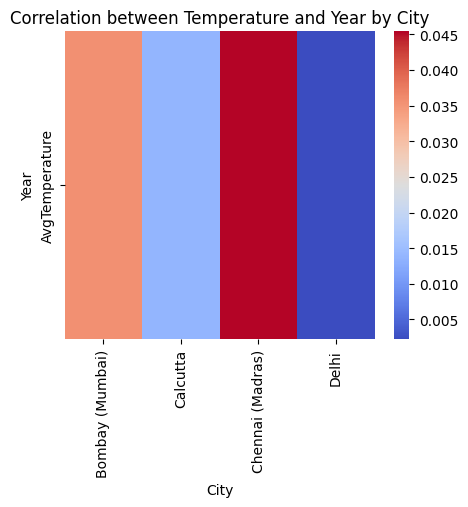

In [20]:
plt.figure(figsize=(5,4))
sns.heatmap(city_correlations.unstack(level=0), cmap='coolwarm')
plt.title('Correlation between Temperature and Year by City')
plt.xlabel('City')
plt.ylabel('Year')
plt.show()

 Highest and Lowest temperature recorded city in India from dataset

In [21]:
high_c = df_filtered.sort_values(by=['AvgTemperature'],ascending=False).head(1)
low_c = df_filtered.sort_values(by=['AvgTemperature'],ascending=True).head(1)
data_c = pd.concat([high_c,low_c],)
data_c.index = ['Highest','Lowest']
data_c

,Region,Country,City,Month,Day,Year,AvgTemperature
Highest,Asia,India,Delhi,5.0,28.0,1998.0,103.7
Lowest,Asia,India,Calcutta,3.0,7.0,2007.0,-99.0
